<a href="https://colab.research.google.com/github/El3naJ3rril/big4_financial_risk_analysis/blob/main/Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
df = pd.read_csv("big4_financial_risk_compliance.csv")
df.head()

,Year,Firm_Name,Total_Audit_Engagements,High_Risk_Cases,Compliance_Violations,Fraud_Cases_Detected,Industry_Affected,Total_Revenue_Impact,AI_Used_for_Auditing,Employee_Workload,Audit_Effectiveness_Score,Client_Satisfaction_Score
0,2020,PwC,2829,51,123,39,Healthcare,114.24,No,57,5.8,8.4
1,2022,Deloitte,3589,185,30,60,Healthcare,156.98,Yes,58,5.3,6.7
2,2020,PwC,2438,212,124,97,Healthcare,131.83,No,76,6.1,6.2
3,2021,PwC,2646,397,55,97,Healthcare,229.11,No,60,5.1,8.6
4,2020,PwC,2680,216,99,46,Healthcare,48.00,No,51,9.1,6.7


In [ ]:
df.isnull().sum()


,0
Year,0
Firm_Name,0
Total_Audit_Engagements,0
High_Risk_Cases,0
Compliance_Violations,0
Fraud_Cases_Detected,0
Industry_Affected,0
Total_Revenue_Impact,0
AI_Used_for_Auditing,0
Employee_Workload,0


In [ ]:
df.describe()


,Year,Total_Audit_Engagements,High_Risk_Cases,Compliance_Violations,Fraud_Cases_Detected,Total_Revenue_Impact,Employee_Workload,Audit_Effectiveness_Score,Client_Satisfaction_Score
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,2022.320000,2784.520000,277.730000,105.480000,52.700000,272.539000,60.250000,7.490000,7.339000
std,1.780251,1281.863073,135.735174,55.370101,28.311221,139.151401,11.163048,1.516209,1.429127
min,2020.000000,603.000000,51.000000,10.000000,5.000000,33.460000,40.000000,5.000000,5.000000
25%,2021.000000,1768.250000,162.500000,54.500000,27.000000,155.217500,52.750000,6.100000,6.100000
50%,2022.000000,2650.000000,293.000000,114.500000,54.000000,264.450000,60.000000,7.450000,7.350000
75%,2024.000000,4008.750000,395.500000,149.500000,74.500000,406.090000,68.000000,8.825000,8.525000
max,2025.000000,4946.000000,500.000000,200.000000,100.000000,497.060000,80.000000,10.000000,10.000000


In [ ]:
df['Firm_Name'].unique()

array(['PwC', 'Deloitte', 'Ernst & Young', 'KPMG'], dtype=object)

In [ ]:
df['Industry_Affected'].unique()

array(['Healthcare', 'Finance', 'Retail', 'Tech'], dtype=object)

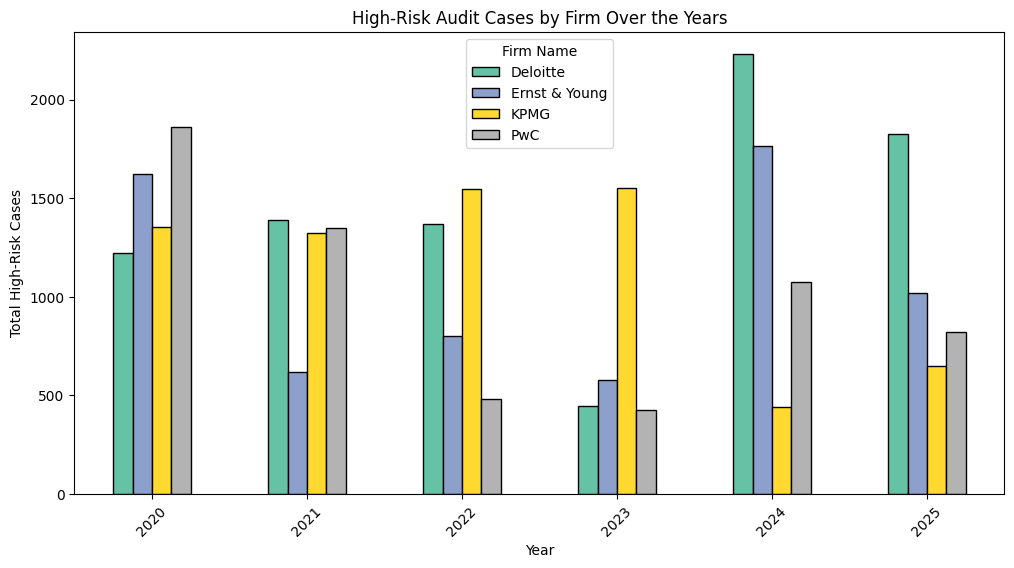

In [ ]:
import matplotlib.pyplot as plt

# Group by Year and Firm_Name, then sum High_Risk_Cases
df_grouped = df.groupby(["Year", "Firm_Name"])["High_Risk_Cases"].sum().unstack()

# Plot the grouped data
df_grouped.plot(kind="bar", figsize=(12, 6), colormap="Set2", edgecolor="black")

# Labels and title
plt.xlabel("Year")
plt.ylabel("Total High-Risk Cases")
plt.title("High-Risk Audit Cases by Firm Over the Years")
plt.xticks(rotation=45)
plt.legend(title="Firm Name")

# Display the plot
plt.show()


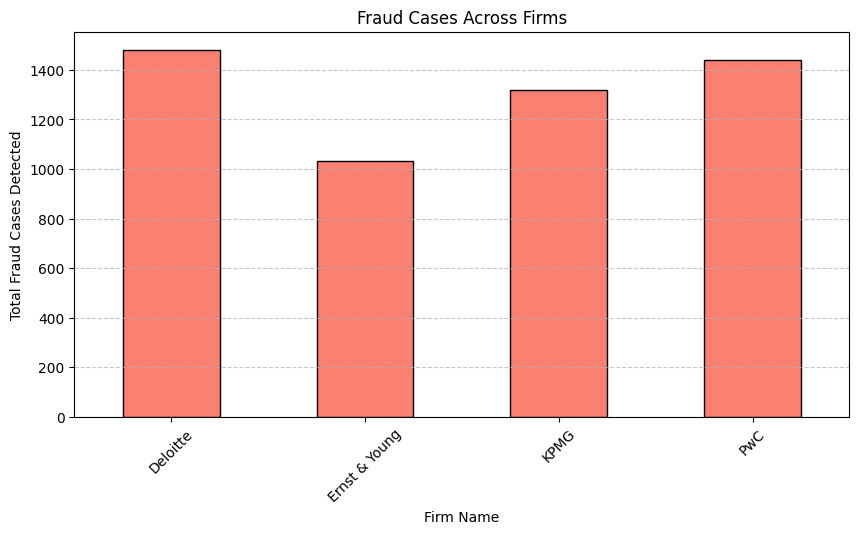

In [ ]:
import matplotlib.pyplot as plt

# Group by Firm_Name and sum Fraud_Cases_Detected
df_fraud = df.groupby("Firm_Name")["Fraud_Cases_Detected"].sum()

# Plot the grouped data
plt.figure(figsize=(10, 5))
df_fraud.plot(kind="bar", color="salmon", edgecolor="black")

# Labels and title
plt.xlabel("Firm Name")
plt.ylabel("Total Fraud Cases Detected")
plt.title("Fraud Cases Across Firms")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Display the plot
plt.show()



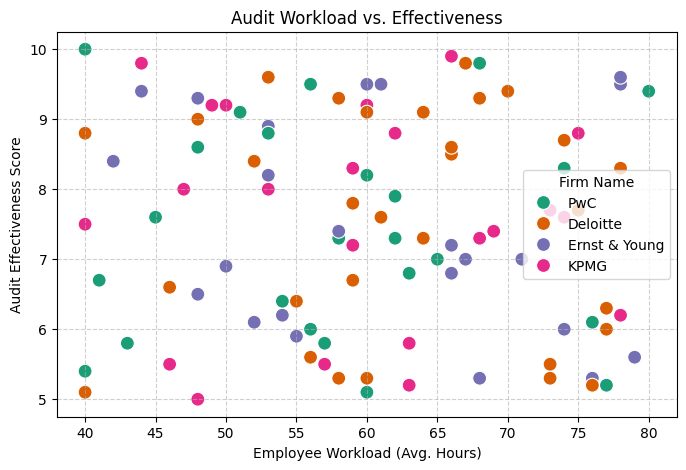

In [ ]:
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x="Employee_Workload", y="Audit_Effectiveness_Score", hue="Firm_Name", palette="Dark2", s=100)

plt.xlabel("Employee Workload (Avg. Hours)")
plt.ylabel("Audit Effectiveness Score")
plt.title("Audit Workload vs. Effectiveness")
plt.grid(True, linestyle="--", alpha=0.6)
plt.legend(title="Firm Name")

plt.show()


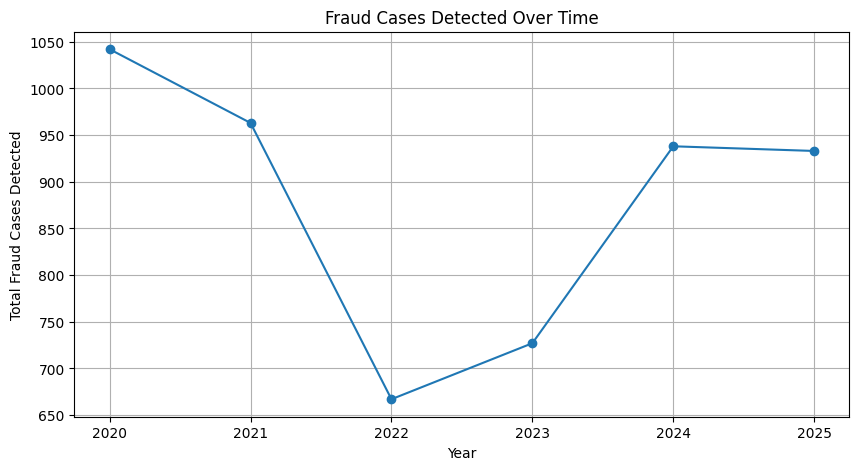

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(df.groupby('Year')['Fraud_Cases_Detected'].sum(), marker='o', linestyle='-')
plt.xlabel("Year")
plt.ylabel("Total Fraud Cases Detected")
plt.title("Fraud Cases Detected Over Time")
plt.grid()
plt.show()


<ipython-input-14-7532cf2f8877>:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="Firm_Name", y="Fraud_Cases_Detected", data=df, ci=None)  # Remove confidence intervals


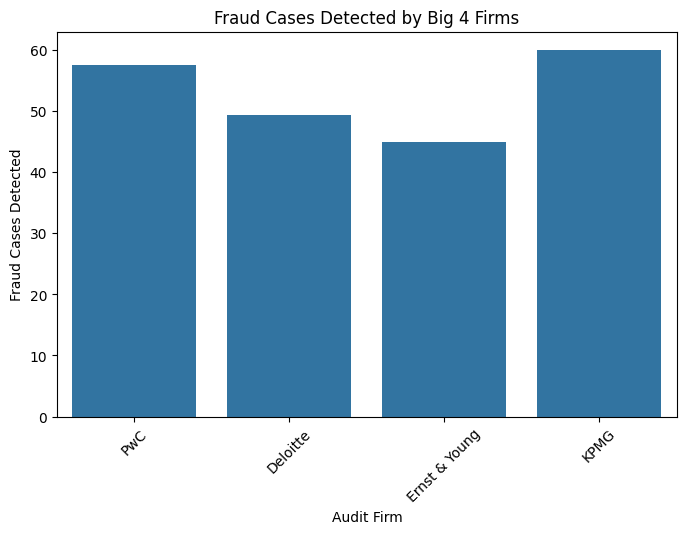

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.barplot(x="Firm_Name", y="Fraud_Cases_Detected", data=df, ci=None)
plt.xlabel("Audit Firm")
plt.ylabel("Fraud Cases Detected")
plt.title("Fraud Cases Detected by Big 4 Firms")
plt.xticks(rotation=45)
plt.show()



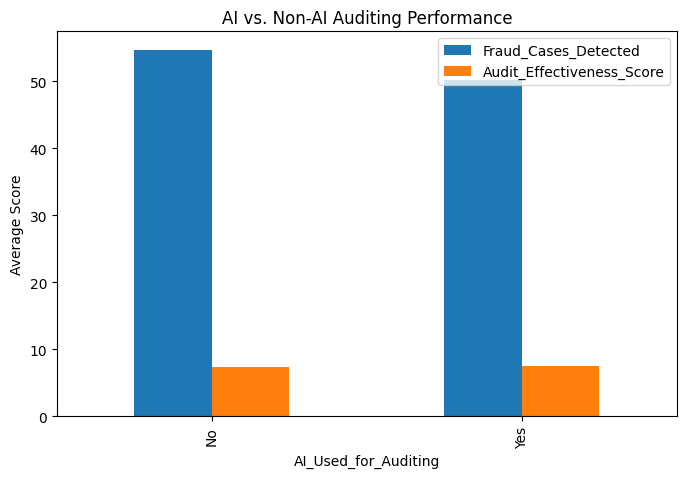

In [ ]:
df_ai = df.groupby("AI_Used_for_Auditing")[["Fraud_Cases_Detected", "Audit_Effectiveness_Score"]].mean()
df_ai.plot(kind="bar", figsize=(8,5), title="AI vs. Non-AI Auditing Performance")
plt.ylabel("Average Score")
plt.show()


In [ ]:
correlation = df['High_Risk_Cases'].corr(df['Compliance_Violations'])
print(f"Correlation between High Risk Cases and Compliance Violations: {correlation}")



Correlation between High Risk Cases and Compliance Violations: -0.030903834427287506
